In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *

/opt/conda/envs/Base/lib/python3.9/site-packages/sktime/utils/validation/series.py:21: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  VALID_INDEX_TYPES = (pd.Int64Index, pd.RangeIndex, pd.PeriodIndex, pd.DatetimeIndex)


In [2]:
df = pd.read_csv('feature_importance/merged_feature_importance.csv', index_col=0)
df = df.dropna(axis=1, how='any')
df

,ml_algorithm,forecasting_algorithm,run,feature_importance_method,value__has_duplicate_max,value__mean_second_derivative_central,value__median,value__length,value__standard_deviation,value__skewness,...,value__energy_ratio_by_chunks__num_segments_10__segment_focus_5,value__energy_ratio_by_chunks__num_segments_10__segment_focus_6,value__ratio_beyond_r_sigma__r_0.5,value__ratio_beyond_r_sigma__r_1,value__ratio_beyond_r_sigma__r_1.5,value__ratio_beyond_r_sigma__r_2.5,value__ratio_beyond_r_sigma__r_3,value__ratio_beyond_r_sigma__r_6,value__lempel_ziv_complexity__bins_2,value__permutation_entropy__dimension_3__tau_1
0,M4RandomForestSingleOutputRegressor,106,24,shap,0.000287,0.002015,0.018361,0.000991,0.004577,0.001189,...,0.000757,0.001988,0.000562,0.000851,0.000615,0.000556,0.000531,0.000268,0.001002,0.004303
1,M4RandomForestRegressor,256,18,shap,0.000317,0.001942,0.012493,0.011043,0.004097,0.000878,...,0.001728,0.001991,0.000624,0.000698,0.000620,0.001001,0.000437,0.000242,0.001335,0.003058
2,M4DummyMeanRegression,243,5,shap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,M4XGBRegressor,Theta,12,shap,0.000323,0.004803,0.021700,0.005030,0.010489,0.003052,...,0.001464,0.002437,0.000644,0.001199,0.000615,0.000623,0.001130,0.000292,0.004180,0.004436
4,M4XGBRegressor,078,15,shap,0.000292,0.003989,0.016970,0.004807,0.007605,0.002599,...,0.001631,0.002586,0.002034,0.000746,0.000962,0.000693,0.000944,0.000313,0.001133,0.004712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29275,M4RandomForestRegressor,sNaive,3,shap,0.000301,0.002060,0.014822,0.004195,0.004892,0.001004,...,0.001740,0.002312,0.000698,0.000619,0.000663,0.001930,0.000674,0.000306,0.000878,0.002781
29276,M4DummyMeanRegression,078,6,shap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
29277,M4XGBRegressor,219,12,shap,0.000586,0.003147,0.021873,0.015610,0.003692,0.006103,...,0.001454,0.004581,0.002105,0.001643,0.001271,0.000663,0.001361,0.000529,0.003244,0.004665
29278,M4DummyMeanRegression,126,5,shap,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
figures_directory = 'figures'

In [4]:
df['ml_algorithm'].unique()

array(['M4RandomForestSingleOutputRegressor', 'M4RandomForestRegressor',
       'M4DummyMeanRegression', 'M4XGBRegressor',
       'M4KerasNetRegressionModel'], dtype=object)

In [5]:
static_columns = ['feature_importance_method', 'forecasting_algorithm', 'ml_algorithm', 'run']
feature_columns = set(df.columns) - set(static_columns)
feature_columns = sorted(list(feature_columns))

In [6]:
dfr = feature_importance_to_feature_rank(df, feature_columns)

In [7]:
dfr

,ml_algorithm,forecasting_algorithm,run,feature_importance_method,value__has_duplicate_max,value__mean_second_derivative_central,value__median,value__length,value__standard_deviation,value__skewness,...,value__energy_ratio_by_chunks__num_segments_10__segment_focus_5,value__energy_ratio_by_chunks__num_segments_10__segment_focus_6,value__ratio_beyond_r_sigma__r_0.5,value__ratio_beyond_r_sigma__r_1,value__ratio_beyond_r_sigma__r_1.5,value__ratio_beyond_r_sigma__r_2.5,value__ratio_beyond_r_sigma__r_3,value__ratio_beyond_r_sigma__r_6,value__lempel_ziv_complexity__bins_2,value__permutation_entropy__dimension_3__tau_1
0,M4RandomForestSingleOutputRegressor,106,24,shap,8.0,52.0,62.0,37.0,57.0,45.0,...,28.0,51.0,22.0,35.0,23.0,21.0,19.0,6.0,39.0,55.0
1,M4RandomForestRegressor,256,18,shap,18.0,51.0,62.0,61.0,55.0,33.0,...,47.0,52.0,22.0,25.0,21.0,38.0,19.0,8.0,45.0,54.0
2,M4DummyMeanRegression,243,5,shap,32.0,32.0,32.0,32.0,32.0,32.0,...,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0
3,M4XGBRegressor,Theta,12,shap,9.0,54.0,63.0,55.0,59.0,50.0,...,38.0,49.0,20.0,32.0,17.0,18.0,29.0,5.0,52.0,53.0
4,M4XGBRegressor,078,15,shap,6.0,51.0,62.0,54.0,57.0,48.0,...,43.0,47.0,45.0,20.0,28.0,17.0,27.0,7.0,33.0,53.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29275,M4RandomForestRegressor,sNaive,3,shap,11.0,50.0,62.0,55.0,56.0,36.0,...,48.0,51.0,26.0,21.0,23.0,49.0,25.0,14.0,31.0,54.0
29276,M4DummyMeanRegression,078,6,shap,32.0,32.0,32.0,32.0,32.0,32.0,...,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0
29277,M4XGBRegressor,219,12,shap,15.0,43.0,62.0,61.0,48.0,54.0,...,26.0,51.0,35.0,27.0,22.0,18.0,23.0,11.0,45.0,52.0
29278,M4DummyMeanRegression,126,5,shap,32.0,32.0,32.0,32.0,32.0,32.0,...,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0,32.0


In [8]:
l = dfr.melt(id_vars=static_columns, var_name="feature", value_name="importance").groupby(['feature_importance_method','ml_algorithm', 'feature']).agg({'importance':'mean'}).reset_index()
l

,feature_importance_method,ml_algorithm,feature,importance
0,permutation,M4DummyMeanRegression,"value__agg_linear_trend__attr_""slope""__chunk_l...",32.000000
1,permutation,M4DummyMeanRegression,"value__agg_linear_trend__attr_""stderr""__chunk_...",32.000000
2,permutation,M4DummyMeanRegression,"value__agg_linear_trend__attr_""stderr""__chunk_...",32.000000
3,permutation,M4DummyMeanRegression,value__ar_coefficient__coeff_10__k_10,32.000000
4,permutation,M4DummyMeanRegression,"value__augmented_dickey_fuller__attr_""teststat...",32.000000
...,...,...,...,...
1003,xgboost-weight,M4XGBRegressor,value__symmetry_looking__r_0.15000000000000002,11.476230
1004,xgboost-weight,M4XGBRegressor,value__symmetry_looking__r_0.2,8.209563
1005,xgboost-weight,M4XGBRegressor,value__symmetry_looking__r_0.30000000000000004,5.156284
1006,xgboost-weight,M4XGBRegressor,value__symmetry_looking__r_0.4,4.469945


In [9]:
df2 = l.query(f'feature_importance_method == "permutation"').groupby(['ml_algorithm', 'feature'])['importance'].mean().unstack().T.reset_index()
df2

ml_algorithm,feature,M4DummyMeanRegression,M4KerasNetRegressionModel,M4RandomForestRegressor,M4RandomForestSingleOutputRegressor,M4XGBRegressor
0,"value__agg_linear_trend__attr_""slope""__chunk_l...",32.0,50.553552,53.153005,57.422951,58.380874
1,"value__agg_linear_trend__attr_""stderr""__chunk_...",32.0,53.834426,42.647541,43.622951,41.693443
2,"value__agg_linear_trend__attr_""stderr""__chunk_...",32.0,58.987978,62.858470,62.263934,60.767213
3,value__ar_coefficient__coeff_10__k_10,32.0,6.134426,26.264481,27.148634,30.503279
4,"value__augmented_dickey_fuller__attr_""teststat...",32.0,13.362295,45.842623,44.412022,40.056831
...,...,...,...,...,...,...
58,value__symmetry_looking__r_0.15000000000000002,32.0,28.073224,9.042623,9.108197,11.225410
59,value__symmetry_looking__r_0.2,32.0,19.483607,8.551366,7.728962,9.596448
60,value__symmetry_looking__r_0.30000000000000004,32.0,8.370492,5.921858,6.462295,7.393443
61,value__symmetry_looking__r_0.4,32.0,5.206011,6.651639,7.300273,7.212022


In [10]:
def plotify_df(df):
    df = df.copy(deep=True)
    d = get_feature_name_map()
    df['feature'] = df['feature'].map(d)
    
    #d = get_meta_model_name_map()
    #df['feature'] = df['feature'].map(d)
    #df = df.rename(columns = d)
    return df

In [11]:
model_map = get_meta_model_name_map()

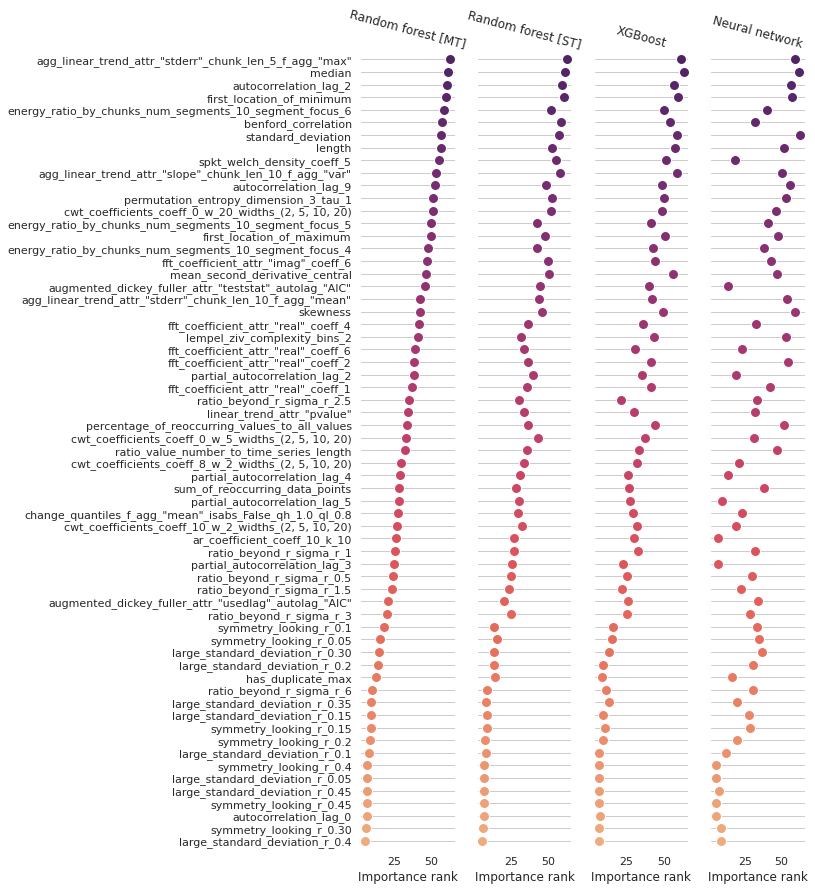

In [12]:
sns.set_theme(style="whitegrid")

# Use semantically meaningful titles for the columns
titles = ['M4RandomForestRegressor', 'M4RandomForestSingleOutputRegressor', 'M4XGBRegressor', 'M4KerasNetRegressionModel']

# Make the PairGrid
g = sns.PairGrid(df2.sort_values(by="M4RandomForestRegressor", ascending=False).pipe(plotify_df),
                 x_vars=titles, y_vars=["feature"],
                 height=12, aspect=.15)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlabel="Importance rank", ylabel="")

for ax, title in zip(g.axes.flat, [model_map[x] for x in titles]):

    # Set a different title for each axes
    #ax.set(title=title)

    ax.set_title(title, rotation = -15)
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)
plt.savefig(f'{figures_directory}/feature_importance_fixed_permutation.pdf', bbox_inches='tight', pad_inches=0)

In [13]:
l = dfr.melt(id_vars=static_columns, var_name="feature", value_name="importance").groupby(['feature_importance_method','forecasting_algorithm', 'feature']).agg({'importance':'mean'}).reset_index()
l

,feature_importance_method,forecasting_algorithm,feature,importance
0,permutation,005,"value__agg_linear_trend__attr_""slope""__chunk_l...",50.066667
1,permutation,005,"value__agg_linear_trend__attr_""stderr""__chunk_...",40.853333
2,permutation,005,"value__agg_linear_trend__attr_""stderr""__chunk_...",55.846667
3,permutation,005,value__ar_coefficient__coeff_10__k_10,23.886667
4,permutation,005,"value__augmented_dickey_fuller__attr_""teststat...",32.760000
...,...,...,...,...
30739,xgboost-weight,sNaive,value__symmetry_looking__r_0.15000000000000002,12.166667
30740,xgboost-weight,sNaive,value__symmetry_looking__r_0.2,7.816667
30741,xgboost-weight,sNaive,value__symmetry_looking__r_0.30000000000000004,5.116667
30742,xgboost-weight,sNaive,value__symmetry_looking__r_0.4,3.766667


In [14]:
df2 = l.query(f'feature_importance_method == "permutation"').groupby(['forecasting_algorithm', 'feature'])['importance'].mean().unstack().T.reset_index()
df2

forecasting_algorithm,feature,005,009,024,030,036,039,043,069,070,...,Damped,ETS,Holt,MLP,Naive,Naive2,RNN,SES,Theta,sNaive
0,"value__agg_linear_trend__attr_""slope""__chunk_l...",50.066667,49.473333,51.666667,50.813333,50.793333,50.700000,51.093333,50.653333,50.400000,...,52.186667,50.920000,51.413333,45.260000,50.193333,50.560000,45.506667,50.726667,50.213333,50.106667
1,"value__agg_linear_trend__attr_""stderr""__chunk_...",40.853333,42.213333,42.506667,44.020000,42.160000,42.480000,44.066667,41.600000,41.180000,...,41.920000,41.440000,43.013333,49.100000,42.220000,43.480000,44.726667,42.493333,42.106667,42.540000
2,"value__agg_linear_trend__attr_""stderr""__chunk_...",55.846667,54.933333,55.933333,55.966667,55.920000,55.866667,55.860000,55.933333,53.700000,...,55.793333,55.926667,55.780000,53.306667,54.906667,55.706667,54.093333,55.906667,55.893333,55.726667
3,value__ar_coefficient__coeff_10__k_10,23.886667,25.693333,28.073333,22.866667,25.453333,23.073333,23.780000,25.913333,23.213333,...,25.286667,25.593333,25.040000,21.540000,25.006667,23.473333,23.140000,24.413333,23.366667,20.953333
4,"value__augmented_dickey_fuller__attr_""teststat...",32.760000,43.993333,34.940000,35.166667,33.206667,34.033333,36.153333,34.600000,35.753333,...,33.840000,34.820000,34.506667,37.053333,32.206667,32.473333,35.906667,32.340000,33.026667,33.766667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,value__symmetry_looking__r_0.15000000000000002,17.423333,17.140000,16.606667,17.740000,17.386667,17.276667,18.483333,17.826667,19.260000,...,17.150000,17.416667,17.443333,22.200000,18.420000,18.080000,20.420000,17.480000,17.906667,18.040000
59,value__symmetry_looking__r_0.2,15.036667,15.556667,16.433333,15.370000,15.253333,14.370000,15.910000,15.373333,15.176667,...,15.606667,15.010000,15.146667,16.383333,15.543333,15.306667,16.026667,15.450000,15.470000,15.736667
60,value__symmetry_looking__r_0.30000000000000004,11.690000,12.013333,11.626667,12.260000,12.110000,11.953333,12.010000,11.903333,11.396667,...,12.260000,11.850000,12.226667,11.580000,11.996667,12.323333,12.070000,12.063333,11.760000,11.436667
61,value__symmetry_looking__r_0.4,11.643333,11.550000,11.753333,12.186667,11.563333,11.550000,11.916667,11.700000,11.560000,...,11.550000,11.823333,11.830000,11.270000,11.513333,11.520000,11.286667,11.500000,11.653333,11.046667


In [15]:
df2 = df2.pipe(plotify_df)

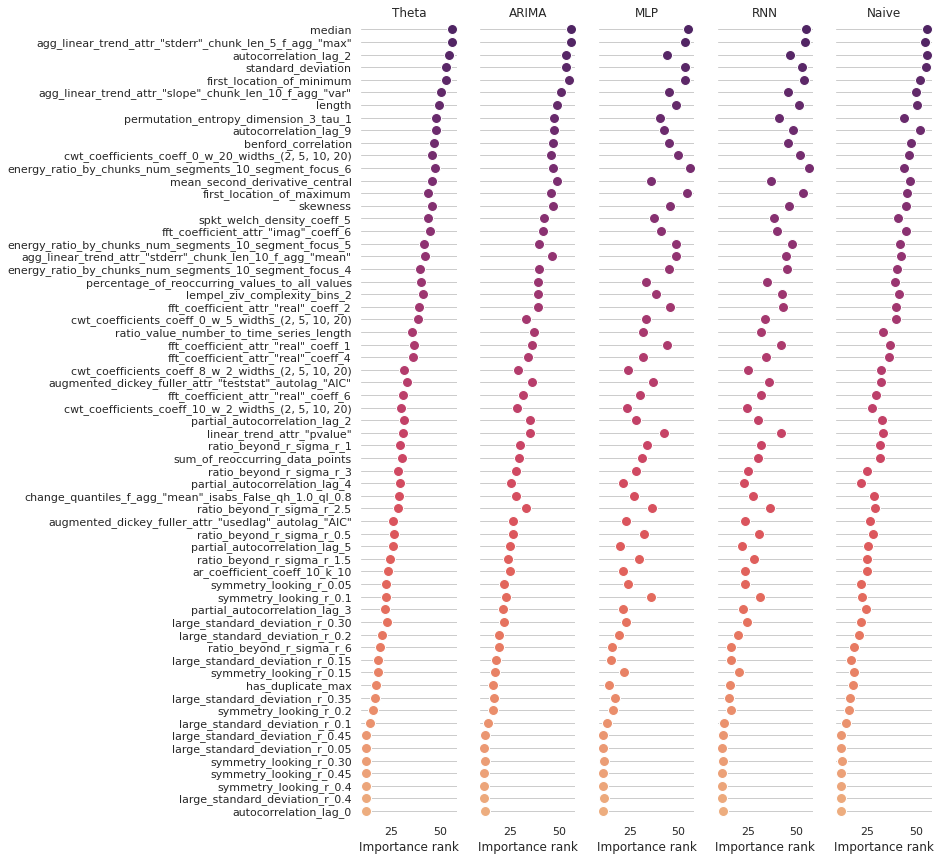

In [16]:
sns.set_theme(style="whitegrid")

# Use semantically meaningful titles for the columns
titles = ['Theta', 'ARIMA', 'MLP', 'RNN', 'Naive']

# Make the PairGrid
g = sns.PairGrid(df2.sort_values(by="005", ascending=False),
                 x_vars=titles, y_vars=["feature"],
                 height=12, aspect=.15)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10, orient="h", jitter=False,
      palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlabel="Importance rank", ylabel="")

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)
plt.savefig(f'{figures_directory}/feature_importance_fixed_permutation2.pdf', bbox_inches='tight', pad_inches=0)